In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.linear_model import LogisticRegression
%matplotlib inline

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

## Import the data

In [2]:
df = pd.read_csv('../Assets/train.txt', '\t', na_values={'is_news' : '?', 'alchemy_category_score' : '?',
                                                         'news_front_page' : '?'}).fillna(0)

# Extract the title and body from the boilerplate JSON text
df['title'] = df.boilerplate.map(lambda x: json.loads(x).get('title', ''))
df['body'] = df.boilerplate.map(lambda x: json.loads(x).get('body', ''))
df['alchemy_category'] = df['alchemy_category'].apply(lambda x: 'unknown' if x == '?' else x)

In [3]:
df['news_front_page'].value_counts()

0.0    7101
1.0     294
Name: news_front_page, dtype: int64

In [4]:
df.dtypes

url                                object
urlid                               int64
boilerplate                        object
alchemy_category                   object
alchemy_category_score            float64
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
framebased                          int64
frameTagRatio                     float64
hasDomainLink                       int64
html_ratio                        float64
image_ratio                       float64
is_news                           float64
lengthyLinkDomain                   int64
linkwordscore                       int64
news_front_page                   float64
non_markup_alphanum_characters      int64
numberOfLinks                       int64
numwords_in_url                   

In [5]:
df.describe()

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.0,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,5305.704665,0.412258,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.0,0.056423,0.021231,0.233778,0.275709,0.615551,0.660311,30.077079,0.039757,5716.598242,178.754564,4.960649,0.172864,0.101221,0.513320
std,3048.384114,0.331274,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.0,0.041446,0.144162,0.052487,1.919320,0.486498,0.473636,20.393101,0.195400,8875.432430,179.466198,3.233111,0.183286,0.079231,0.499856
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,0.000000,0.045564,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2688.500000,0.000000,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.0,0.028502,0.000000,0.201061,0.025900,0.000000,0.000000,14.000000,0.000000,1579.000000,82.000000,3.000000,0.040984,0.068739,0.000000
50%,5304.000000,0.471444,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.0,0.045775,0.000000,0.230564,0.083051,1.000000,1.000000,25.000000,0.000000,3500.000000,139.000000,5.000000,0.113402,0.089312,1.000000
75%,7946.500000,0.708279,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.0,0.073459,0.000000,0.260770,0.236700,1.000000,1.000000,43.000000,0.000000,6377.000000,222.000000,7.000000,0.241299,0.112376,1.000000
max,10566.000000,0.999426,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.0,0.444444,1.000000,0.716883,113.333333,1.000000,1.000000,100.000000,1.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000,1.000000


In [6]:
df['framebased'].value_counts()

0    7395
Name: framebased, dtype: int64

In [7]:
df.drop('framebased', axis=1, inplace=True)

In [8]:
df.isnull().sum()

url                                0
urlid                              0
boilerplate                        0
alchemy_category                   0
alchemy_category_score             0
avglinksize                        0
commonlinkratio_1                  0
commonlinkratio_2                  0
commonlinkratio_3                  0
commonlinkratio_4                  0
compression_ratio                  0
embed_ratio                        0
frameTagRatio                      0
hasDomainLink                      0
html_ratio                         0
image_ratio                        0
is_news                            0
lengthyLinkDomain                  0
linkwordscore                      0
news_front_page                    0
non_markup_alphanum_characters     0
numberOfLinks                      0
numwords_in_url                    0
parametrizedLinkRatio              0
spelling_errors_ratio              0
label                              0
title                             12
b

In [9]:
df['alchemy_category'].value_counts()

unknown               2348
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
weather                  4
Name: alchemy_category, dtype: int64

#### Does being a news site effect evergreen-ness?

No, the correlation is almost non-existant between a site being classified as "is_news" and being classified as evergreen.  And the logistic regression score is 51%, hardly better than a random guess.

In [10]:
df.corr()['label'].sort_values()

frameTagRatio                    -0.187762
linkwordscore                    -0.173800
compression_ratio                -0.059737
spelling_errors_ratio            -0.058578
html_ratio                       -0.051149
numwords_in_url                  -0.024823
news_front_page                  -0.017885
image_ratio                      -0.017266
alchemy_category_score           -0.014582
hasDomainLink                    -0.004863
avglinksize                       0.006172
is_news                           0.009103
parametrizedLinkRatio             0.010668
urlid                             0.013450
lengthyLinkDomain                 0.032824
embed_ratio                       0.039536
numberOfLinks                     0.080187
commonlinkratio_4                 0.080464
commonlinkratio_1                 0.083364
commonlinkratio_2                 0.083488
non_markup_alphanum_characters    0.097580
commonlinkratio_3                 0.105964
label                             1.000000
Name: label

In [11]:
logit = LogisticRegression()

x = df['is_news'].reshape(-1,1)
y = df['label']

logit.fit(x, y)
logit.score(x, y)

0.5133198106828939

#### Does the website category effect evergreen-ness?
Yes,the logistic regression score is 60%, so there is some predictive capability provided by website categories. Also, certain categories such as sports, computer/internet, arts/entertainment are negatively correlated with evergreen-ness and business and recreation are positively correlated with evergreen-ness.

In [12]:
data = pd.get_dummies(df, columns= ['alchemy_category'])

In [13]:
data.corr()['label'].sort_values()

frameTagRatio                         -0.187762
linkwordscore                         -0.173800
alchemy_category_sports               -0.143447
alchemy_category_computer_internet    -0.108956
alchemy_category_arts_entertainment   -0.108003
compression_ratio                     -0.059737
spelling_errors_ratio                 -0.058578
html_ratio                            -0.051149
alchemy_category_gaming               -0.029541
numwords_in_url                       -0.024823
alchemy_category_culture_politics     -0.024530
alchemy_category_weather              -0.023892
alchemy_category_science_technology   -0.022826
alchemy_category_religion             -0.019174
news_front_page                       -0.017885
image_ratio                           -0.017266
alchemy_category_unknown              -0.015852
alchemy_category_score                -0.014582
alchemy_category_law_crime            -0.012198
hasDomainLink                         -0.004863
avglinksize                            0

In [14]:
list(data.columns).index(u'alchemy_category_business')


28

In [15]:
x = data.iloc[:,28:-2]
y = data['label']

logit.fit(x, y)
logit.score(x, y)

0.60824881676808651

#### Does the image ratio effect evergreen-ness
No, the image ratio has a low correlation and a logistic regression score of 51%.

In [16]:
x = data['image_ratio'].reshape(-1,1)
y = data['label']

logit.fit(x, y)
logit.score(x, y)

0.51588911426639616

#### Find the logistic regression using statsmodel

In [17]:
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [18]:
data_2 = data
data_2['intercept'] = 1

In [19]:
x = data_2.iloc[:, 28:-3].join(data_2['intercept'])
y = data['label']

logit = sm.Logit(y, x)
model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.652941
         Iterations 5


In [20]:
print model.summary()

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7384
Method:                           MLE   Df Model:                           10
Date:                Wed, 19 Oct 2016   Pseudo R-squ.:                 0.05752
Time:                        12:52:16   Log-Likelihood:                -4828.5
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                3.293e-120
                                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
alchemy_category_business               1.0462      0.082     12.729      0.000         0.885     1.207
alchemy_category_computer_internet     -0.9725      0.13

In [21]:
np.exp(model.params)

alchemy_category_business              2.846833
alchemy_category_computer_internet     0.378128
alchemy_category_culture_politics      0.975008
alchemy_category_gaming                0.673811
alchemy_category_health                1.550835
alchemy_category_law_crime             0.834242
alchemy_category_recreation            2.503719
alchemy_category_religion              0.825075
alchemy_category_science_technology    0.971171
alchemy_category_sports                0.298338
intercept                              0.865722
dtype: float64

#### Make a great model

In [22]:
data_num = data.drop(['url', 'urlid', 'boilerplate', 'title', 'body'], axis=1)

In [23]:
data_num.columns

Index([u'alchemy_category_score', u'avglinksize', u'commonlinkratio_1',
       u'commonlinkratio_2', u'commonlinkratio_3', u'commonlinkratio_4',
       u'compression_ratio', u'embed_ratio', u'frameTagRatio',
       u'hasDomainLink', u'html_ratio', u'image_ratio', u'is_news',
       u'lengthyLinkDomain', u'linkwordscore', u'news_front_page',
       u'non_markup_alphanum_characters', u'numberOfLinks', u'numwords_in_url',
       u'parametrizedLinkRatio', u'spelling_errors_ratio', u'label',
       u'alchemy_category_arts_entertainment', u'alchemy_category_business',
       u'alchemy_category_computer_internet',
       u'alchemy_category_culture_politics', u'alchemy_category_gaming',
       u'alchemy_category_health', u'alchemy_category_law_crime',
       u'alchemy_category_recreation', u'alchemy_category_religion',
       u'alchemy_category_science_technology', u'alchemy_category_sports',
       u'alchemy_category_unknown', u'alchemy_category_weather', u'intercept'],
      dtype='object')

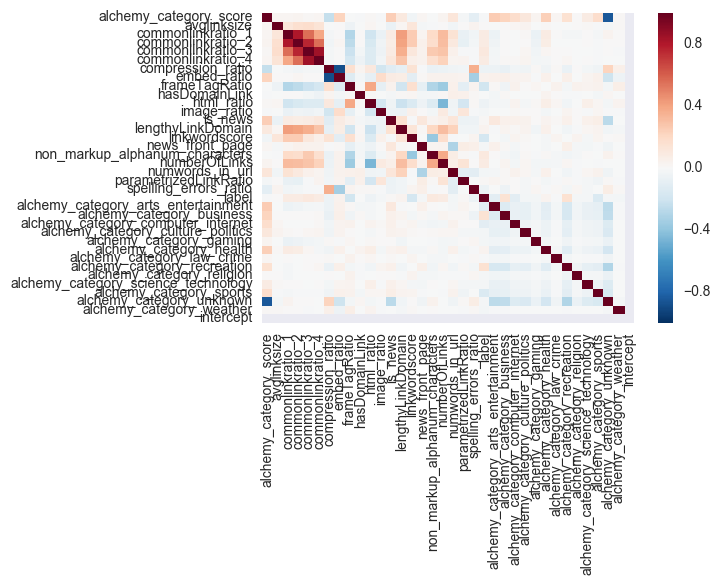

In [25]:
sns.heatmap(data_num.corr())

In [30]:
logit = LogisticRegression()

x = data['alchemy_category_score', alchem])
y = data['label']

logit.fit(x, y)
logit.score(x, y)

0.60960108181203521

In [15]:
data.head()

,url,urlid,boilerplate,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body,alchemy_category_?,alchemy_category_arts_entertainment,alchemy_category_business,alchemy_category_computer_internet,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,http://www.bloomberg.com/news/2010-12-23/ibm-predicts-holographic-calls-air-breathing-batteries-by-2015.html,4042,"{""title"":""IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries"",""body"":""A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at...",0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1.0,1,24,0,5424,170,8,0.152941,0.079130,0,"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries",A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose Califor...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,http://www.popsci.com/technology/article/2012-07/electronic-futuristic-starting-gun-eliminates-advantages-races,8471,"{""title"":""The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races"",""body"":""And that can be carried on a pla...",0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1.0,1,40,0,4973,187,9,0.181818,0.125448,1,"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races",And that can be carried on a plane without the hassle too The Omega E Gun Starting Pistol Omega It s easy to take for granted just how insanely close some Olympic races are and how much the minutiae of it all can matter The perfect example is the traditional starting gun Seems easy You pull a tr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,http://www.menshealth.com/health/flu-fighting-fruits?cm_mmc=Facebook-_-MensHealth-_-Content-Health-_-FightFluWithFruit,1164,"{""title"":""Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health"",""body"":""Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent hea...",0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1.0,1,55,0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health,Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent heart disease and cancer Next Papayas With 250 percent of the RDA of vitamin C a papaya can help kick ...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,